In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'bot-iot-all-features-5-sample:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3910334%2F6796877%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240331%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240331T193715Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D51234eda2bec8a82d60f8b123ab10dc2b7bd047ef557c818049ad85064677ad880c4169cac99d225c655a07d72dfa1a16df48ae216662f79e38038dc641e4a3a46862facc4657b2d233a0ba38e4ead108e258e7543d8d3dfa10438298b00719655d276bb288e684d3b1efc42d8111de67491adf0848313126c516eb7c37ce503004898be3da8c0f34e73ddf507e930d51f82e9f16899b3f070a03a82e64c1acd6cb7f2dccdf06a17bdebdf79d823111afe0bd2bb0716138c701e0f4be70f7e41ec7b958e5959483a6f21f819ee2d16c3b8a968c1e4698f0273dd86ef1c6ef70284348b9f8ca2f72462d85e24482496741f25ee9c05c77c695ef60a50b9c0b175'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 57030013 bytes downloaded
Downloaded and uncompressed: bot-iot-all-features-5-sample
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bot-iot-all-features-5-sample/BoT-IoT 5%/UNSW_2018_IoT_Botnet_Full5pc_3.csv
/kaggle/input/bot-iot-all-features-5-sample/BoT-IoT 5%/UNSW_2018_IoT_Botnet_Full5pc_4.csv
/kaggle/input/bot-iot-all-features-5-sample/BoT-IoT 5%/UNSW_2018_IoT_Botnet_Full5pc_1.csv
/kaggle/input/bot-iot-all-features-5-sample/BoT-IoT 5%/UNSW_2018_IoT_Botnet_Full5pc_2.csv


# Project Title : Comprehensive Analysis of Botnet Behavior in IoT Networks: Patterns, Impacts, and Detection Using Machine Learning

## Group Members:
### 1. Ankur Kaushal
### 2. Dyuti Dasmahapatra
### 3. Yash Verma

## Objective:
### 1. Gain insights into botnet behavior and characteristics within IoT networks through an in-depth analysis of attack patterns, features, and impacts.
### 2. Develop accurate detection mechanisms using machine learning to identify various types of botnet attacks in IoT networks.



In [ ]:
## import required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

### Data Understanding

In [ ]:
# read csv file
combined_df = pd.read_csv("/kaggle/input/bot-iot-all-features-5-sample/BoT-IoT 5%/UNSW_2018_IoT_Botnet_Full5pc_2.csv", dtype={"Column7": str, "Column9": str})

<ipython-input-21-a78107b46f34>:2: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv("/kaggle/input/bot-iot-all-features-5-sample/BoT-IoT 5%/UNSW_2018_IoT_Botnet_Full5pc_2.csv", dtype={"Column7": str, "Column9": str})


In [ ]:
#First 5 rows of the dataset
combined_df.head()

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1000001,1.528085e+09,e,1,udp,3,192.168.100.148,37153,192.168.100.6,80,...,0.319943,100,100,0.319979,0.319943,800,800,1,DoS,UDP
1,1000002,1.528085e+09,e,1,udp,3,192.168.100.148,37154,192.168.100.6,80,...,0.319943,100,100,0.319979,0.319943,800,800,1,DoS,UDP
2,1000003,1.528085e+09,e,1,udp,3,192.168.100.148,37155,192.168.100.6,80,...,0.319943,100,100,0.319979,0.319943,800,800,1,DoS,UDP
3,1000004,1.528085e+09,e,1,udp,3,192.168.100.148,37156,192.168.100.6,80,...,0.319943,100,100,0.319979,0.319943,800,800,1,DoS,UDP
4,1000005,1.528085e+09,e,1,udp,3,192.168.100.148,37157,192.168.100.6,80,...,0.319943,100,100,0.319979,0.319943,800,800,1,DoS,UDP


In [ ]:
# Shape of the dataset
print(f'Dimension of the dataframe {combined_df.shape[0]} rows, {combined_df.shape[1]} columns')

Dimension of the dataframe 1000000 rows, 41 columns


In [ ]:
## data info
print("Basic Information about the DataFrame:")
print()
combined_df.info()

Basic Information about the DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 41 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   pkSeqID                           1000000 non-null  int64  
 1   stime                             1000000 non-null  float64
 2   flgs                              1000000 non-null  object 
 3   flgs_number                       1000000 non-null  int64  
 4   proto                             1000000 non-null  object 
 5   proto_number                      1000000 non-null  int64  
 6   saddr                             1000000 non-null  object 
 7   sport                             1000000 non-null  object 
 8   daddr                             1000000 non-null  object 
 9   dport                             1000000 non-null  object 
 10  pkts                              1000000 non-null  int64  
 11

In [ ]:
## statistic of the dataset
print("Basic Statistical Summary of the DataFrame:")
combined_df.describe()

Basic Statistical Summary of the DataFrame:


,pkSeqID,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0
mean,1.500000e+06,1.528089e+09,1.309226,2.300519,7.552940,532.778284,3.322139,1.528089e+09,129961.020477,20.611798,...,752.897347,1.591332,2.044056,90.590166,82.896298,0.901558,2.043662,640.255942,623.878337,1.0
std,2.886753e+05,5.136923e+03,0.840127,0.953773,10.077958,682.867514,1.098434,5.127937e+03,75856.613411,10.275459,...,418.759165,87.321174,87.684068,19.559557,23.906622,86.991082,87.682664,433.874677,444.010048,0.0
min,1.000001e+06,1.528085e+09,1.000000,1.000000,1.000000,120.000000,1.000000,1.528085e+09,1.000000,0.000000,...,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0
25%,1.250001e+06,1.528085e+09,1.000000,1.000000,4.000000,420.000000,3.000000,1.528085e+09,62260.750000,14.261344,...,440.000000,0.248764,0.257998,94.000000,69.000000,0.245700,0.269137,297.000000,260.750000,1.0
50%,1.500000e+06,1.528085e+09,1.000000,3.000000,7.000000,480.000000,4.000000,1.528085e+09,133250.500000,24.472334,...,714.000000,0.320226,0.320498,100.000000,100.000000,0.314248,0.324158,600.000000,600.000000,1.0
75%,1.750000e+06,1.528096e+09,1.000000,3.000000,8.000000,660.000000,4.000000,1.528096e+09,195751.000000,27.907499,...,904.000000,0.483764,0.483815,100.000000,100.000000,0.456409,0.462998,800.000000,800.000000,1.0
max,2.000000e+06,1.528103e+09,6.000000,4.000000,6900.000000,483000.000000,7.000000,1.528103e+09,262165.000000,113.557701,...,6900.000000,86956.500000,86956.500000,100.000000,100.000000,86956.500000,86956.500000,6900.000000,6900.000000,1.0


In [ ]:
print("The columns / features of the Dataset")
for idx, col in enumerate(combined_df.columns, start=1):
    print(idx, col, sep='\t')

The columns / features of the Dataset
1	pkSeqID
2	stime
3	flgs
4	flgs_number
5	proto
6	proto_number
7	saddr
8	sport
9	daddr
10	dport
11	pkts
12	bytes
13	state
14	state_number
15	ltime
16	seq
17	dur
18	spkts
19	dpkts
20	sbytes
21	dbytes
22	rate
23	srate
24	drate
25	TnBPSrcIP
26	TnBPDstIP
27	TnP_PSrcIP
28	TnP_PDstIP
29	TnP_PerProto
30	TnP_Per_Dport
31	AR_P_Proto_P_SrcIP
32	AR_P_Proto_P_DstIP
33	N_IN_Conn_P_DstIP
34	N_IN_Conn_P_SrcIP
35	AR_P_Proto_P_Sport
36	AR_P_Proto_P_Dport
37	Pkts_P_State_P_Protocol_P_DestIP
38	Pkts_P_State_P_Protocol_P_SrcIP
39	attack
40	category
41	subcategory


In [ ]:
## description of columns

feature_descriptions = {
    'pkSeqID': 'Packet sequence ID',
    'stime': 'Start time of the packet',
    'flgs': 'Flags',
    'flgs_number': 'Flag numbers',
    'proto': 'Protocol',
    'proto_number': 'Protocol number',
    'saddr': 'Source address',
    'sport': 'Source port',
    'daddr': 'Destination address',
    'dport': 'Destination port',
    'pkts': 'Number of packets',
    'bytes': 'Number of bytes',
    'state': 'State',
    'state_number': 'State number',
    'ltime': 'Last time of the packet',
    'seq': 'Sequence',
    'dur': 'Duration',
    'spkts': 'Source packets',
    'dpkts': 'Destination packets',
    'sbytes': 'Source bytes',
    'dbytes': 'Destination bytes',
    'rate': 'Rate',
    'srate': 'Source rate',
    'drate': 'Destination rate',
    'TnBPSrcIP': 'Total number of bytes per source IP',
    'TnBPDstIP': 'Total number of bytes per destination IP',
    'TnP_PSrcIP': 'Total number of packets per source IP',
    'TnP_PDstIP': 'Total number of packets per destination IP',
    'TnP_PerProto': 'Total number of packets per protocol',
    'TnP_Per_Dport': 'Total number of packets per destination port',
    'AR_P_Proto_P_SrcIP': 'Average rate per protocol per source IP',
    'AR_P_Proto_P_DstIP': 'Average rate per protocol per destination IP',
    'N_IN_Conn_P_DstIP': 'Number of incoming connections per destination IP',
    'N_IN_Conn_P_SrcIP': 'Number of incoming connections per source IP',
    'AR_P_Proto_P_Sport': 'Average rate per protocol per source port',
    'AR_P_Proto_P_Dport': 'Average rate per protocol per destination port',
    'Pkts_P_State_P_Protocol_P_DestIP': 'Packets per state per protocol per destination IP',
    'Pkts_P_State_P_Protocol_P_SrcIP': 'Packets per state per protocol per source IP',
    'attack': 'Type of attack',
    'category': 'Category of attack',
    'subcategory': 'Subcategory of attack'
}

column_info = [(idx, col, feature_descriptions.get(col, 'No description')) for idx, col in enumerate(combined_df.columns, start=1)]

print(tabulate(column_info, headers=['s.no', 'Column Name', 'Description'], tablefmt='grid'))


+--------+----------------------------------+---------------------------------------------------+
|   s.no | Column Name                      | Description                                       |
+========+==================================+===================================================+
|      1 | pkSeqID                          | Packet sequence ID                                |
+--------+----------------------------------+---------------------------------------------------+
|      2 | stime                            | Start time of the packet                          |
+--------+----------------------------------+---------------------------------------------------+
|      3 | flgs                             | Flags                                             |
+--------+----------------------------------+---------------------------------------------------+
|      4 | flgs_number                      | Flag numbers                                      |
+--------+----------

In [ ]:
## no of categorical values
categorical_features = []

for col in combined_df.columns:
    if combined_df[col].nunique() < len(combined_df) / 20:  # Adjust the threshold as needed
        categorical_features.append(col)

print("Categorical Features:")
for feature in categorical_features:
    print("- ", feature)

Categorical Features:
-  flgs
-  flgs_number
-  proto
-  proto_number
-  saddr
-  daddr
-  dport
-  pkts
-  bytes
-  state
-  state_number
-  spkts
-  dpkts
-  sbytes
-  dbytes
-  rate
-  srate
-  drate
-  TnBPSrcIP
-  TnBPDstIP
-  TnP_PSrcIP
-  TnP_PDstIP
-  TnP_PerProto
-  TnP_Per_Dport
-  AR_P_Proto_P_SrcIP
-  AR_P_Proto_P_DstIP
-  N_IN_Conn_P_DstIP
-  N_IN_Conn_P_SrcIP
-  AR_P_Proto_P_Sport
-  AR_P_Proto_P_Dport
-  Pkts_P_State_P_Protocol_P_DestIP
-  Pkts_P_State_P_Protocol_P_SrcIP
-  attack
-  category
-  subcategory


In [ ]:
## target variable
print("Value counts of the targer (category) column:")
print(combined_df['category'].value_counts())


Value counts of the targer (category) column:
DoS     650260
DDoS    349740
Name: category, dtype: int64


In [ ]:
## no of null values
print("No. of null values")
combined_df.isnull().sum()

No. of null values


pkSeqID                             0
stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate                                0
srate                               0
drate                               0
TnBPSrcIP                           0
TnBPDstIP                           0
TnP_PSrcIP  

### Data Pre-processing

In [ ]:
combined_df = combined_df.drop(['flgs','proto', 'state', 'subcategory','attack'], axis=1)

In [ ]:
## convert categorical features to numerical features
encoded_df = combined_df.copy()

label_encoders = {}
categorical_columns = ['category']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    encoded_df[column] = label_encoders[column].fit_transform(encoded_df[column])

encoded_df.head()


,pkSeqID,stime,flgs_number,proto_number,saddr,sport,daddr,dport,pkts,bytes,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,category
0,1000001,1.528085e+09,1,3,192.168.100.148,37153,192.168.100.6,80,8,480,...,800,0.319943,0.319943,100,100,0.319979,0.319943,800,800,1
1,1000002,1.528085e+09,1,3,192.168.100.148,37154,192.168.100.6,80,8,480,...,800,0.319943,0.319943,100,100,0.319979,0.319943,800,800,1
2,1000003,1.528085e+09,1,3,192.168.100.148,37155,192.168.100.6,80,8,480,...,800,0.319943,0.319943,100,100,0.319979,0.319943,800,800,1
3,1000004,1.528085e+09,1,3,192.168.100.148,37156,192.168.100.6,80,8,480,...,800,0.319943,0.319943,100,100,0.319979,0.319943,800,800,1
4,1000005,1.528085e+09,1,3,192.168.100.148,37157,192.168.100.6,80,8,480,...,800,0.319943,0.319943,100,100,0.319979,0.319943,800,800,1


In [ ]:
encoded_df['sport'] = pd.to_numeric(encoded_df['sport'], errors='coerce')
encoded_df['dport'] = pd.to_numeric(encoded_df['dport'], errors='coerce')

In [ ]:
## checking data type of each column
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 36 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   pkSeqID                           1000000 non-null  int64  
 1   stime                             1000000 non-null  float64
 2   flgs_number                       1000000 non-null  int64  
 3   proto_number                      1000000 non-null  int64  
 4   saddr                             1000000 non-null  object 
 5   sport                             999994 non-null   float64
 6   daddr                             1000000 non-null  object 
 7   dport                             999994 non-null   float64
 8   pkts                              1000000 non-null  int64  
 9   bytes                             1000000 non-null  int64  
 10  state_number                      1000000 non-null  int64  
 11  ltime                             1000

In [ ]:
df = encoded_df

### Exploratory Data Analysis (EDA)

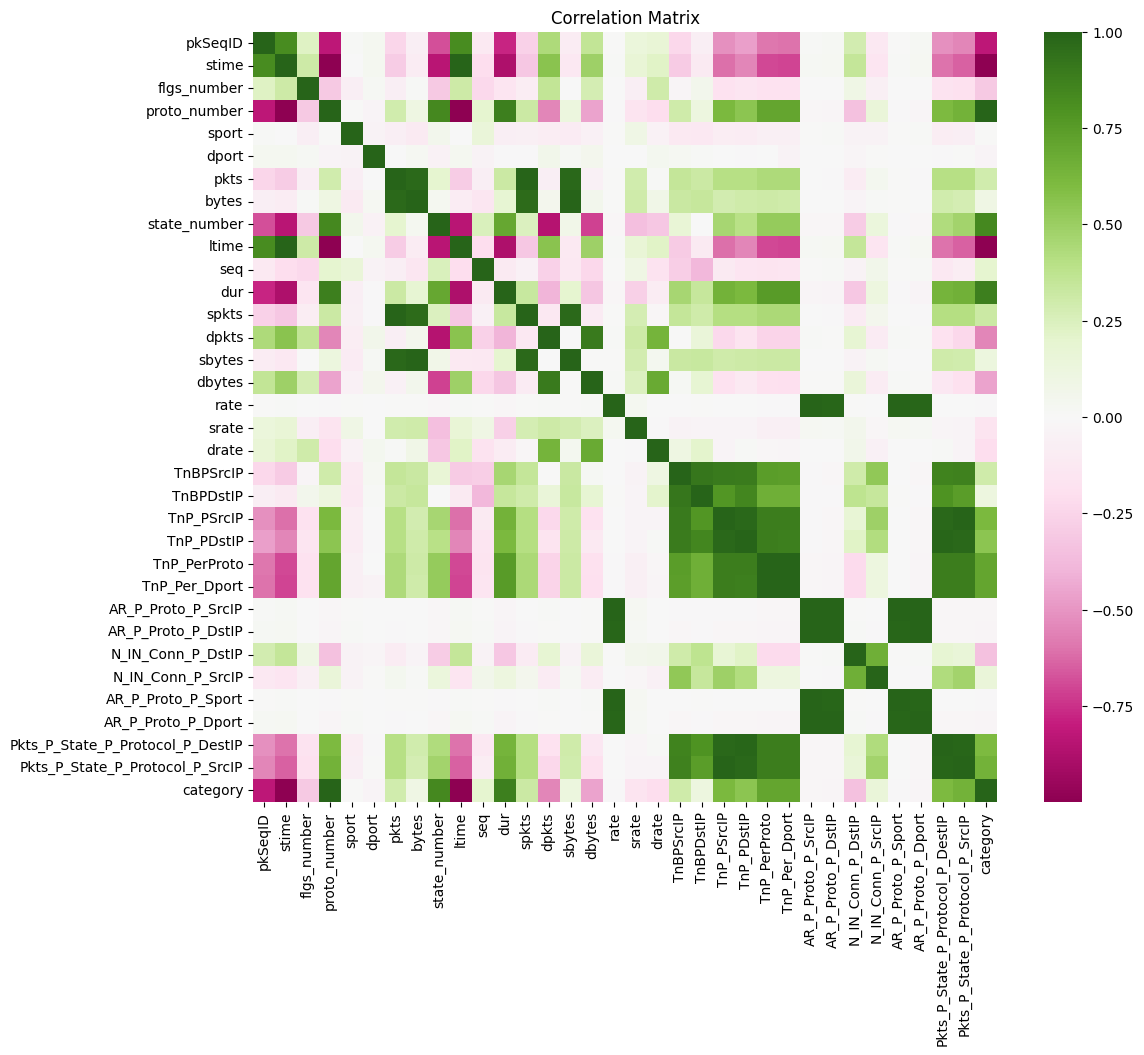

In [ ]:
## plotting correlation matrix to understand the correlation between all the features and target variable (category)

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_columns]
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='PiYG', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


#### Based on the correlation matrix, it appears that the following features ('rate', 'TnBPDstIP', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport') have minimal to no correlation with the target variable. Therefore, we will remove these columns from the dataset.

In [ ]:
## dropping the columns
encoded_df = encoded_df.drop(['pkSeqID','rate', 'TnBPDstIP', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport'], axis=1)

In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   stime                             1000000 non-null  float64
 1   flgs_number                       1000000 non-null  int64  
 2   proto_number                      1000000 non-null  int64  
 3   saddr                             1000000 non-null  object 
 4   sport                             999994 non-null   float64
 5   daddr                             1000000 non-null  object 
 6   dport                             999994 non-null   float64
 7   pkts                              1000000 non-null  int64  
 8   bytes                             1000000 non-null  int64  
 9   state_number                      1000000 non-null  int64  
 10  ltime                             1000000 non-null  float64
 11  seq                               1000

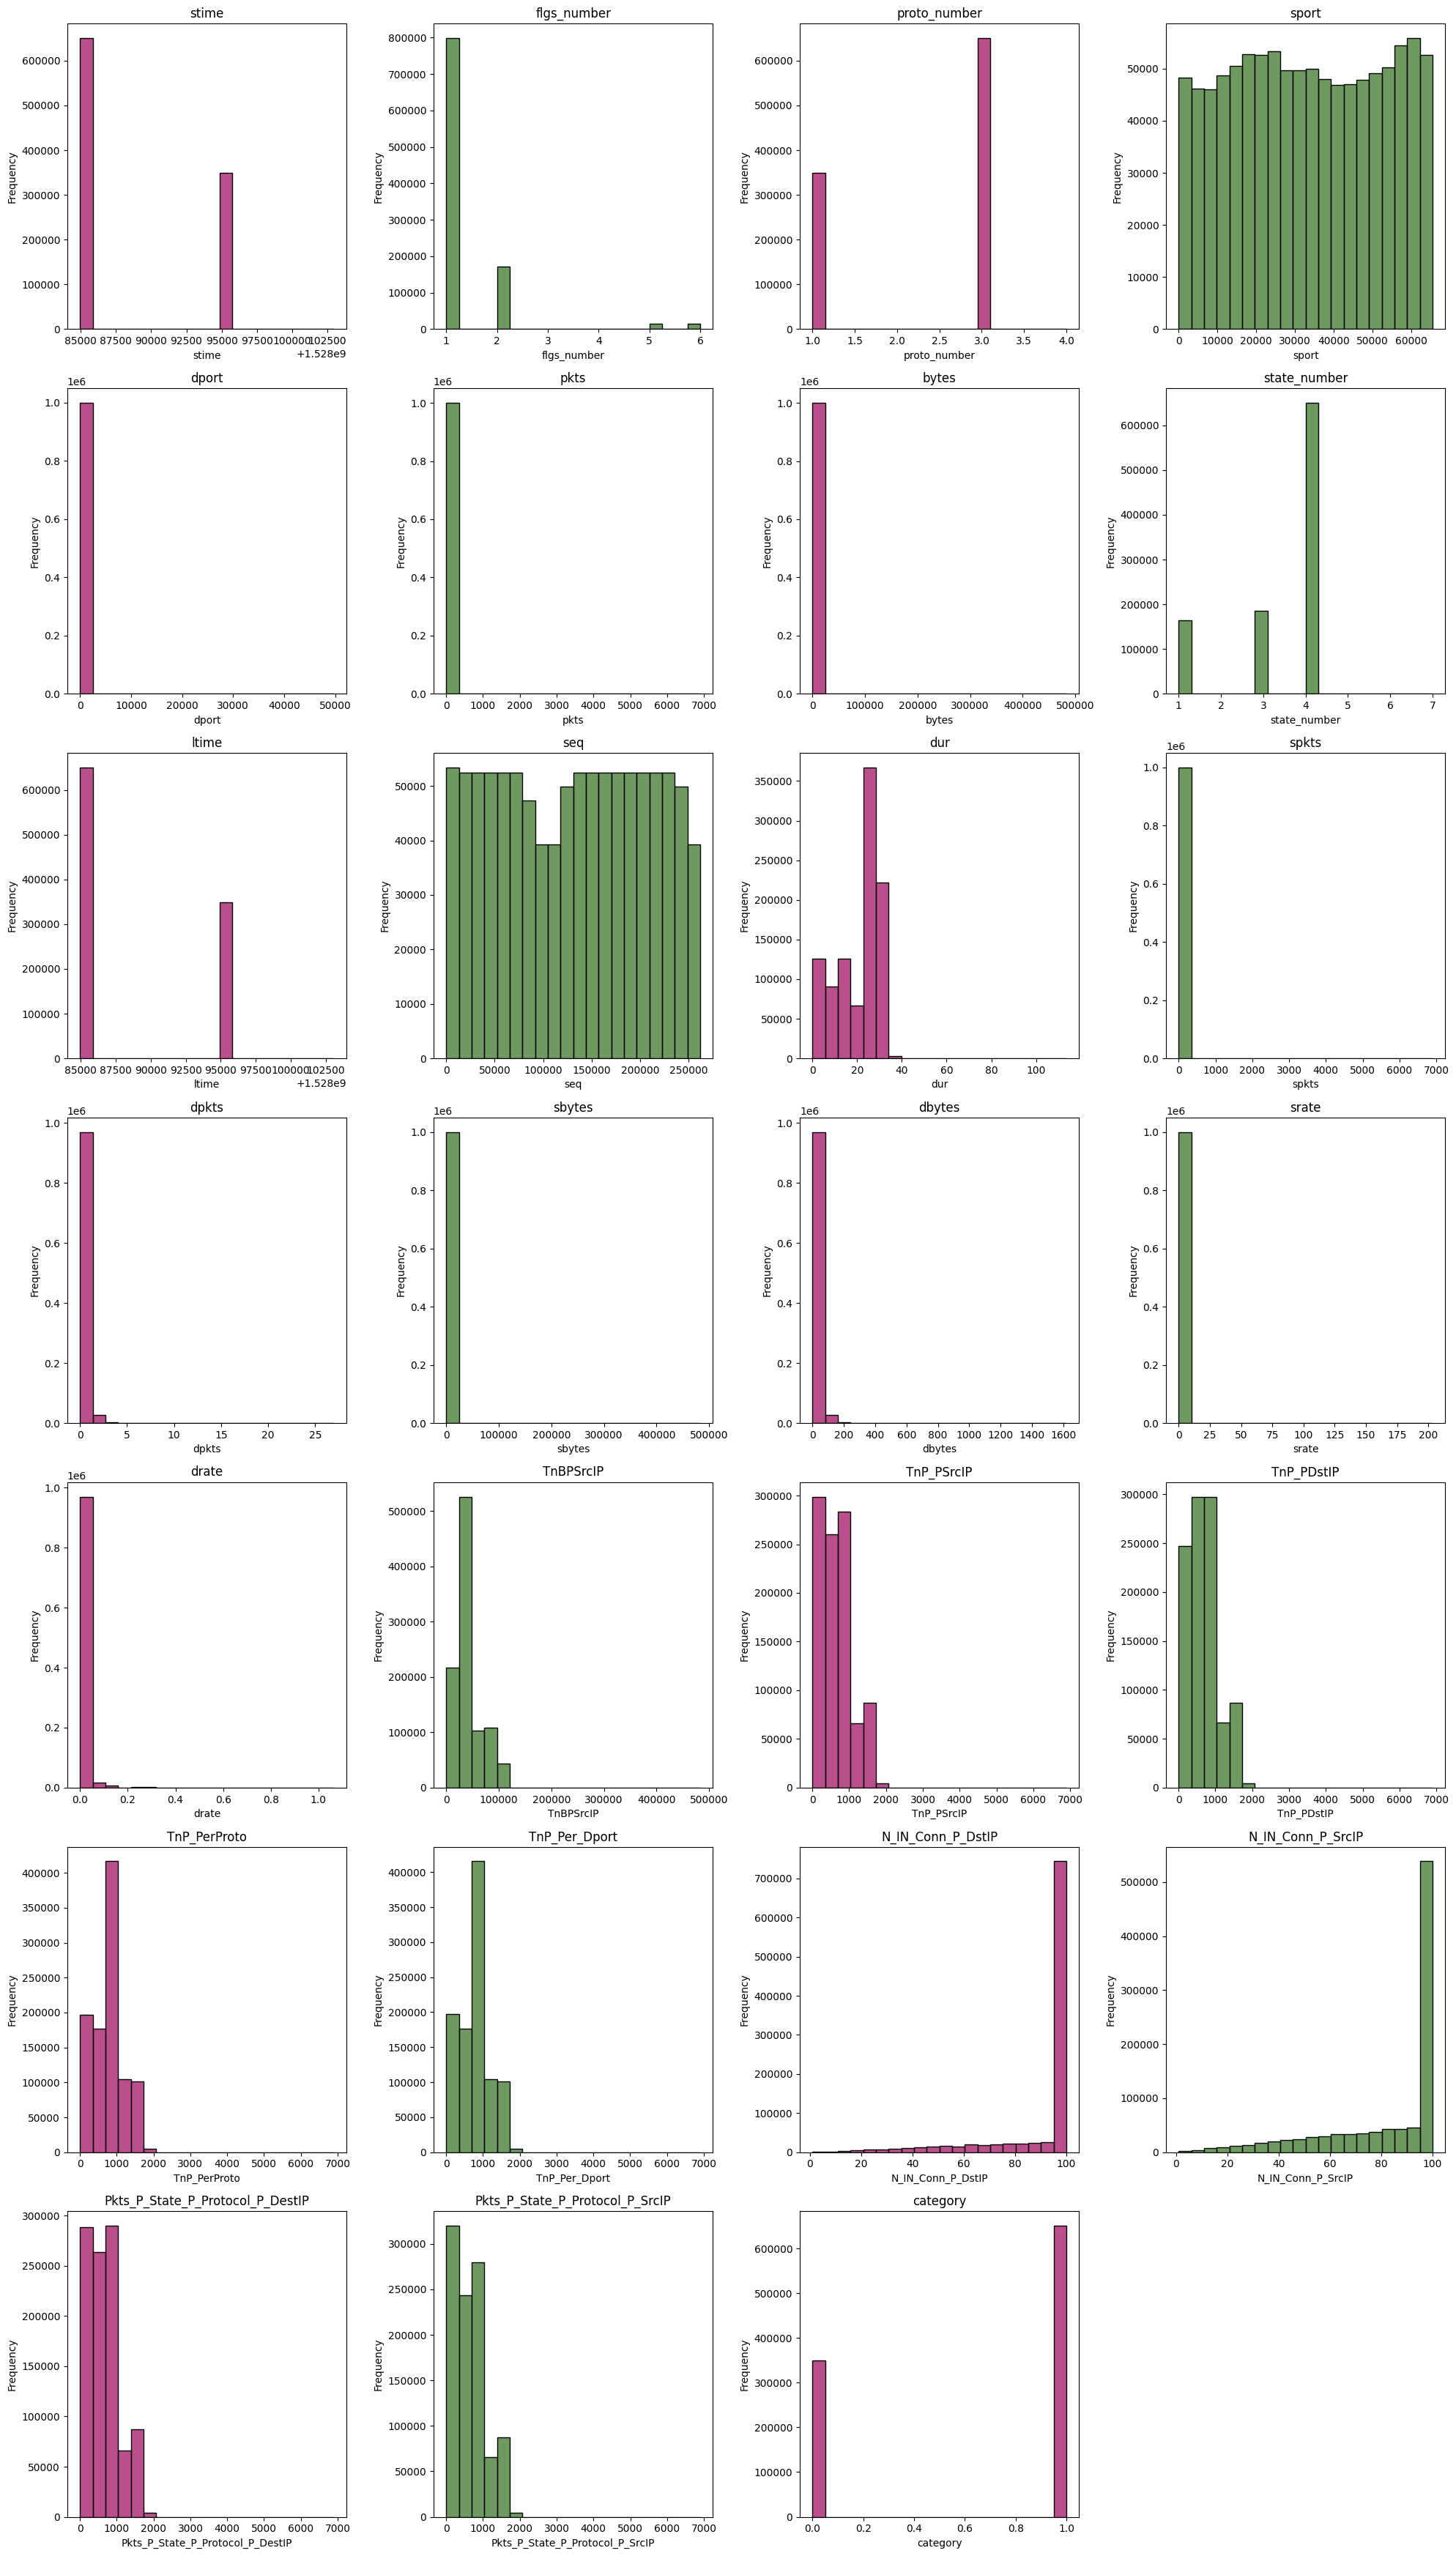

In [ ]:
## Visualisation of Different Features using Histogram
numeric_columns = encoded_df.select_dtypes(include=['int64', 'float64']).columns
num_cols_per_subplot = 4
num_plots = len(numeric_columns)
num_subplots = (num_plots // num_cols_per_subplot) + (num_plots % num_cols_per_subplot > 0)

fig, axes = plt.subplots(nrows=num_subplots, ncols=num_cols_per_subplot, figsize=(20, num_subplots * 5))

axes = axes.flatten()

for i, (col, ax) in enumerate(zip(numeric_columns, axes)):
    encoded_df[col].hist(ax=ax, bins=20, edgecolor='black', color=colors[i % len(colors)])
    ax.set_title(col)
    ax.grid(False)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

for i in range(num_plots, num_subplots * num_cols_per_subplot):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

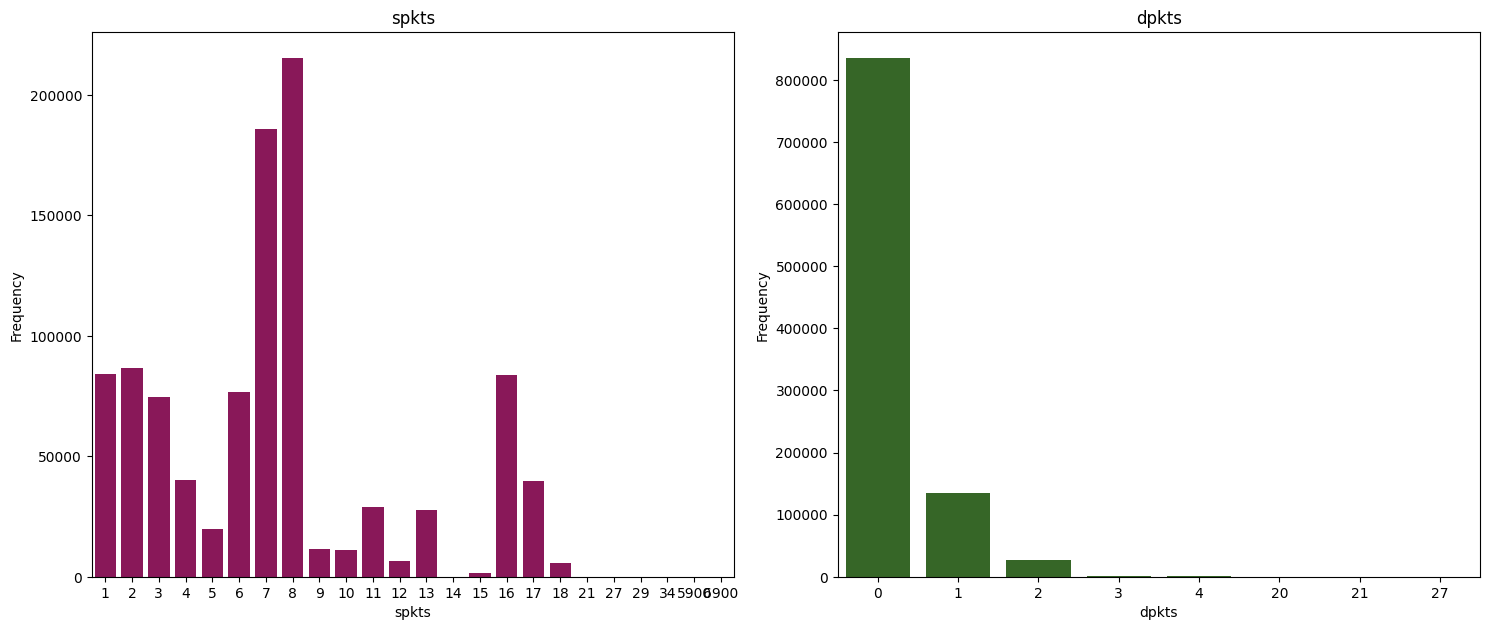

In [ ]:
def plot(column_name, position, color):
    plt.subplot(2, 2, position)
    sns.countplot(data=encoded_df, x=column_name, color=color)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(column_name)

plt.figure(figsize=(15, 12))

cols = ['spkts', 'dpkts']
colors = [(0.61, 0.02, 0.36, 0.5), (0.19, 0.44, 0.11, 0.5)]

for i, (col, color) in enumerate(zip(cols, colors)):
    plot(col, i+1, color)

plt.tight_layout()
plt.show()


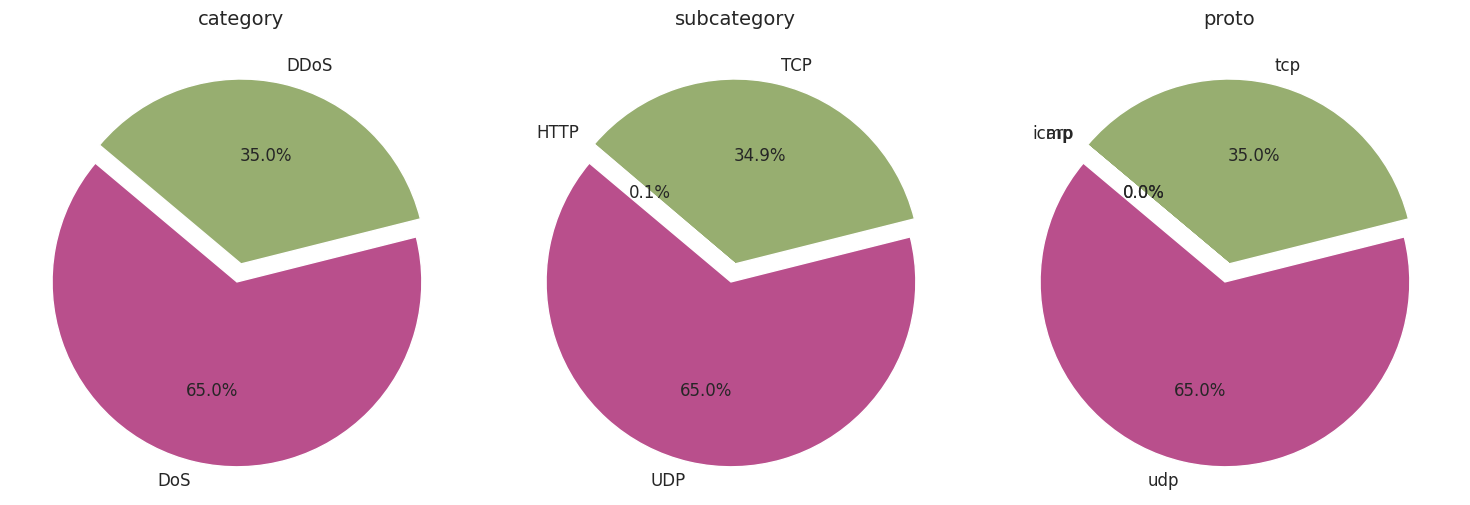

In [ ]:
## visualizing the distribution of categorical features using piechart

categorical_columns = ['category', 'subcategory', 'proto']

custom_colors = [
    [(0.61, 0.02, 0.36, 0.7), ((0.42, 0.55, 0.20, 0.7))],
    [(0.61, 0.02, 0.36, 0.7), ((0.42, 0.55, 0.20, 0.7))],
    [(0.61, 0.02, 0.36, 0.7), ((0.42, 0.55, 0.20, 0.7))]
]

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(15, 5))

for col, ax, colors in zip(categorical_columns, axes, custom_colors):
    counts = combined_df[col].value_counts()
    explode = [0.1] + [0] * (len(counts) - 1)
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
           explode=explode, shadow=False, textprops={'fontsize': 12})
    ax.set_title(col, fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
import warnings
warnings.filterwarnings("ignore")

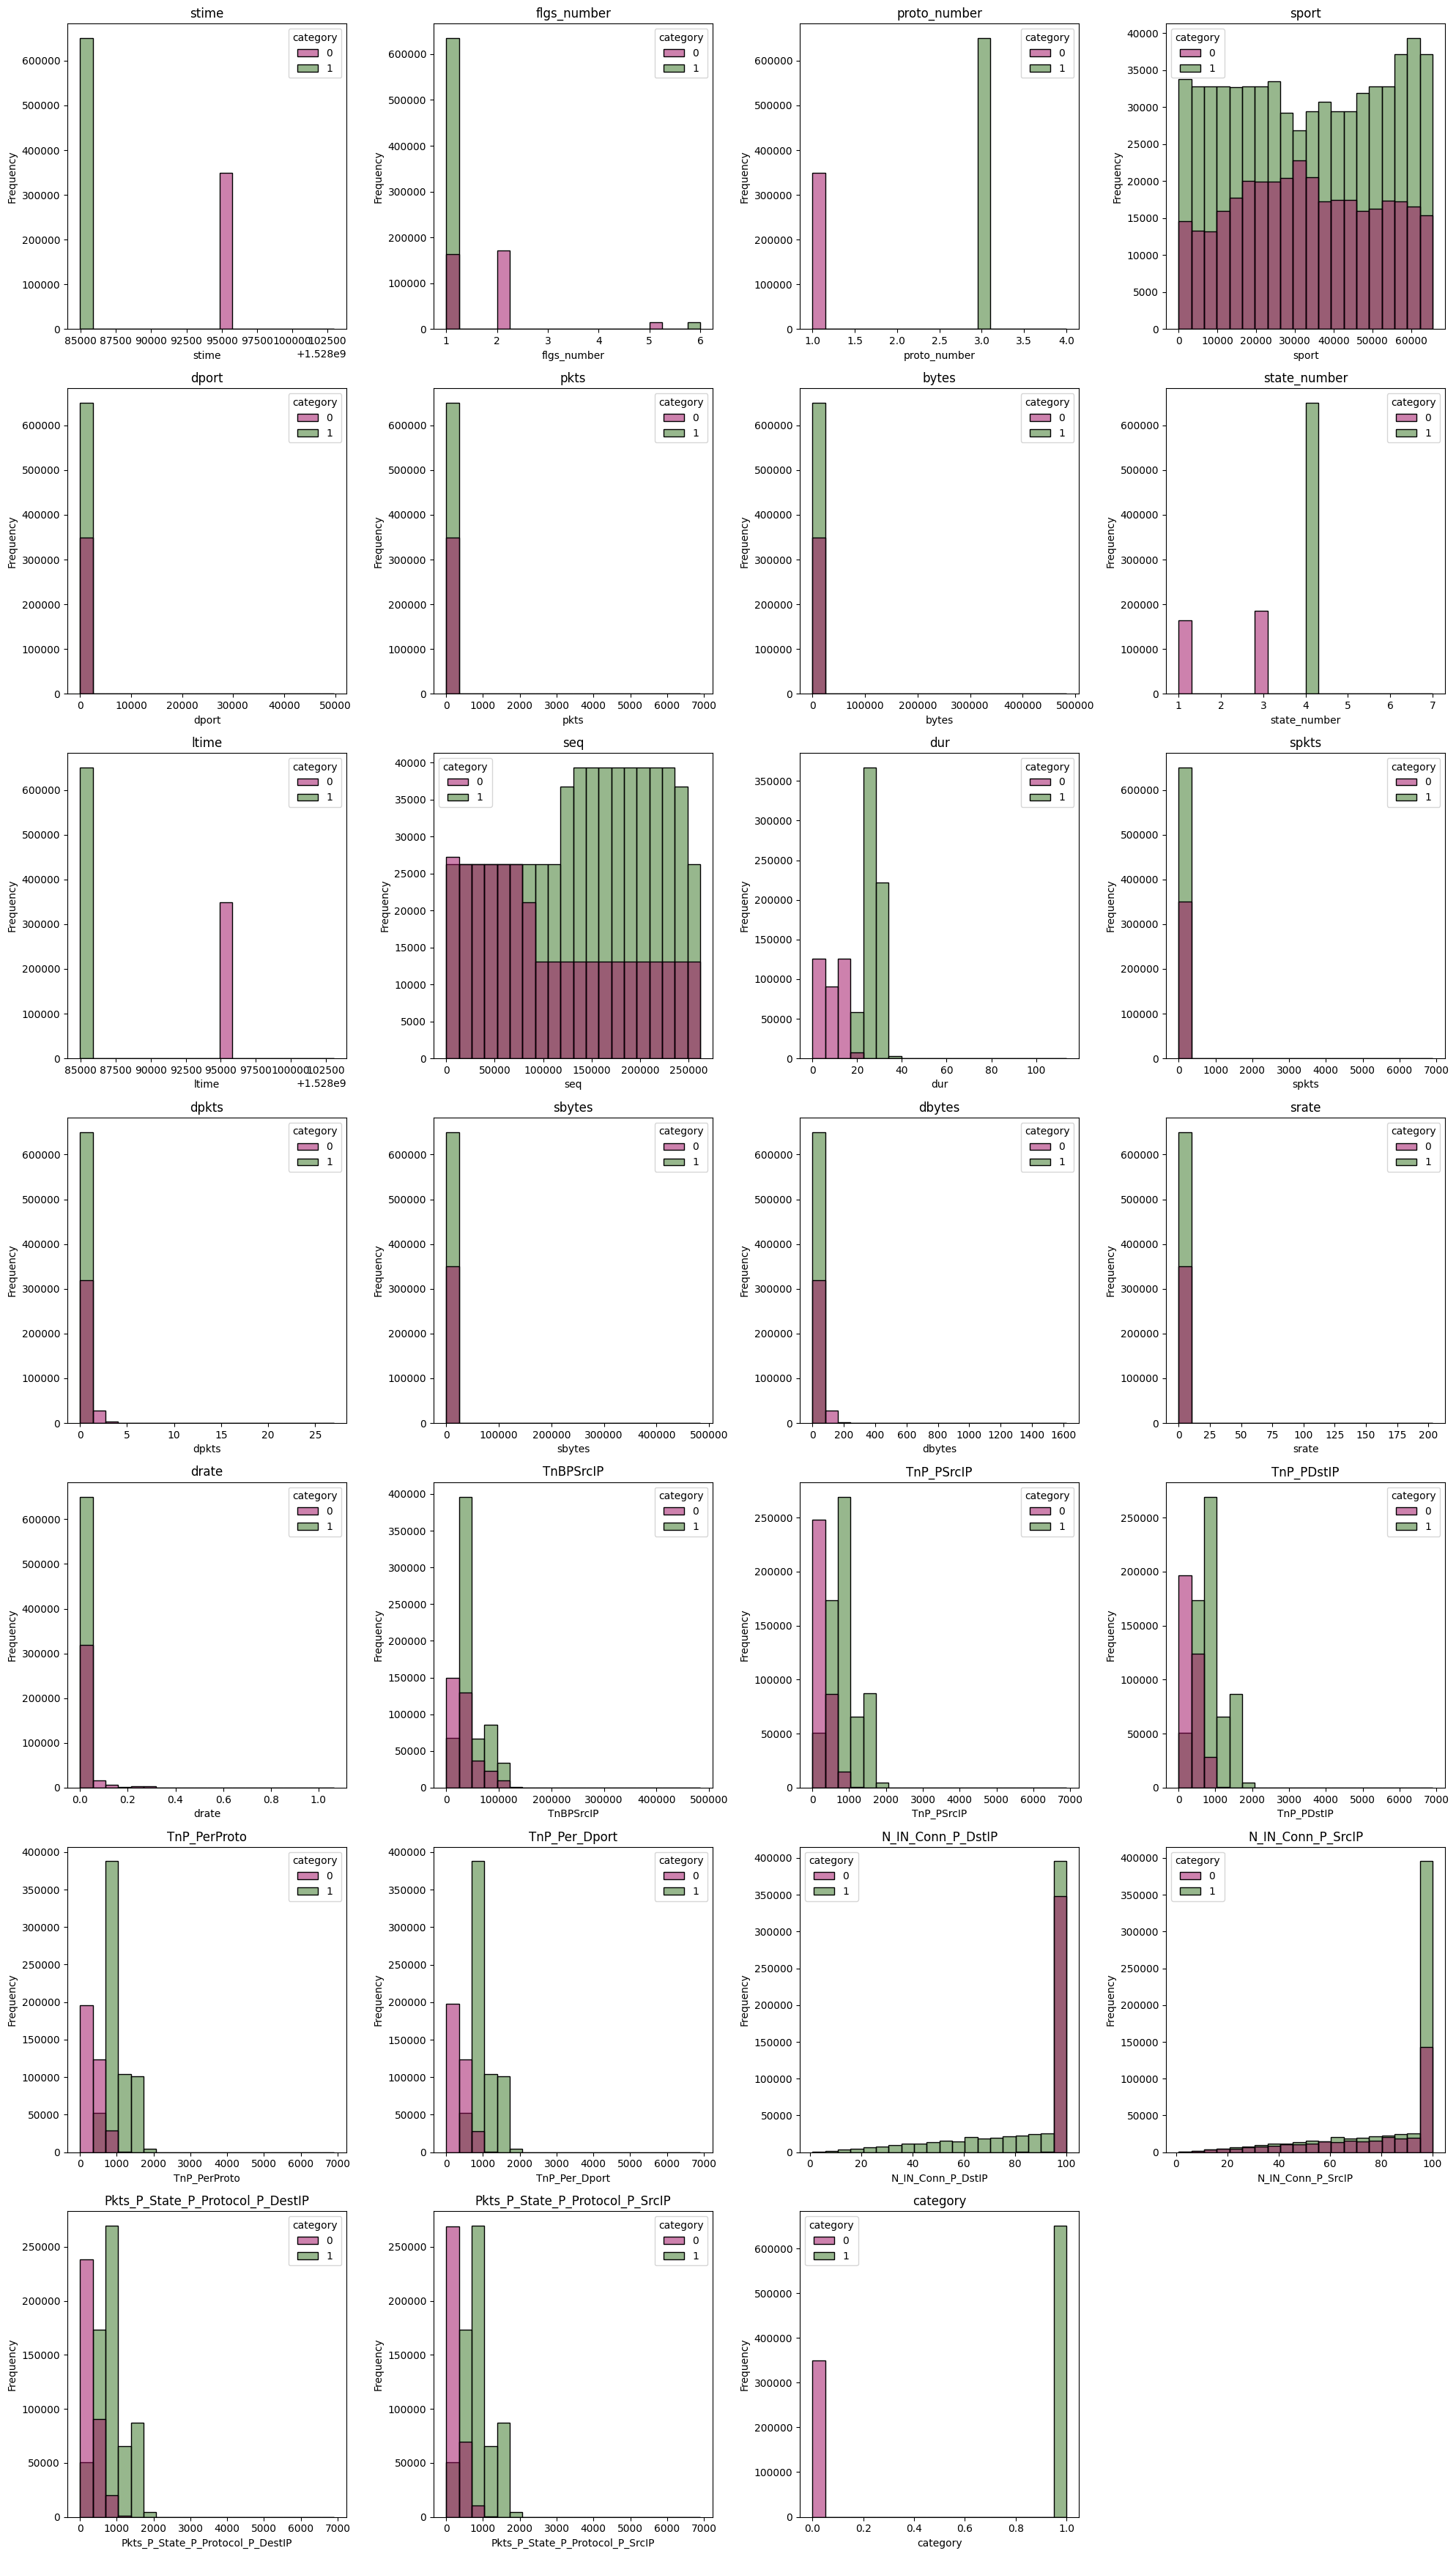

In [ ]:
num_cols_per_subplot = 4

numeric_columns = encoded_df.select_dtypes(include=['int64', 'float64']).columns

num_plots = len(numeric_columns)
num_subplots = (num_plots // num_cols_per_subplot) + (num_plots % num_cols_per_subplot > 0)

fig, axes = plt.subplots(nrows=num_subplots, ncols=num_cols_per_subplot, figsize=(20, num_subplots * 5))
axes = axes.flatten()

colors = [(0.61, 0.02, 0.36, 0.7), (0.19, 0.44, 0.11, 0.7)]

for i, (col, ax) in enumerate(zip(numeric_columns, axes)):
    sns.histplot(data=encoded_df, x=col, hue='category', kde=False, bins=20, ax=ax, palette=colors)
    ax.set_title(col)
    ax.grid(False)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

for i in range(num_plots, num_subplots * num_cols_per_subplot):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()